In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

def stock_price_random_walk(num_days = 1000, initial_price = 100, drift = 0.0, volatility = 0.2) -> np.ndarray:
    """
    Generate synthetic stock price data using random walk

    Args:
        num_days (int): number of days (default 1000)
        initial_price (float): initial stock price (default 100)
        drift (float): drift or average daily return (default 0)
        volatility (float): volatility or standard deviation of daily returns (default 0.2)
    
    Returns:
        a numpy.ndarray contains price data over num_days
    """

    # Generate synthetic stock price data
    daily_returns = np.random.normal(drift / num_days, volatility / np.sqrt(num_days), num_days)
    price = initial_price * np.exp(np.cumsum(daily_returns))
    return price


In [12]:
def stock_price_gbm(
    num_days=1000,
    initial_price=100,
    mu=0.1,
    sigma=0.2,
    dt=1 / 252,
) -> np.ndarray:
    """
    Generate synthetic stock price data using GBM

    Args:
        num_days (int): number of days (default 1000)
        initial_price (float): initial stock price (default 100)
        mu (float): annual drift or average return (default 0.1)
        sigma (float): annual volatility or standard deviation of return (default 0.2)
        dt (float): time step (assuming trading 252 days a year) (default 1 / 252)

    Returns:
        a numpy.ndarray contains price data over num_days
    """

    price = [initial_price]
    for _ in range(num_days - 1):
        drift = (mu - 0.5 * sigma**2) * dt
        diffusion = sigma * np.sqrt(dt) * np.random.normal(0, 1)
        price.append(price[-1] * np.exp(drift + diffusion))
    
    return price

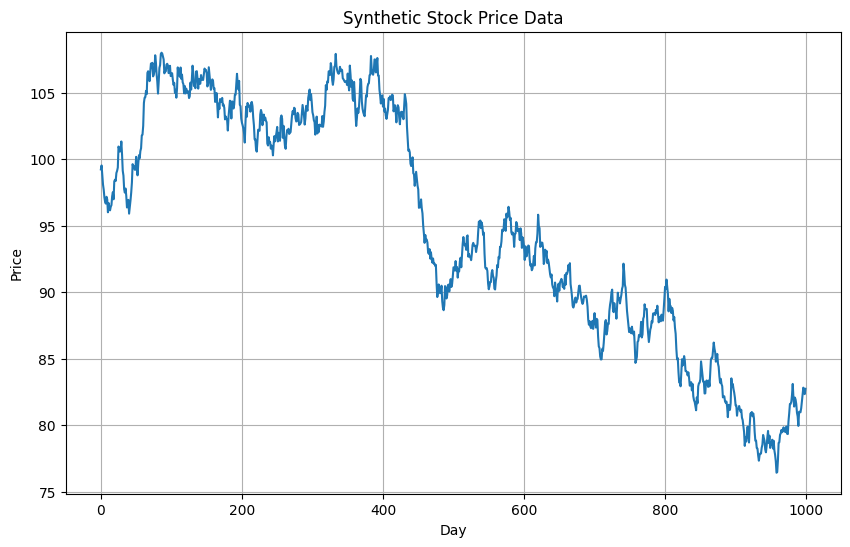

In [19]:
price = stock_price_random_walk()

# Plot the synthetic stock price data
plt.figure(figsize=(10, 6))
plt.plot(price)
plt.title("Synthetic Stock Price Data")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.show()

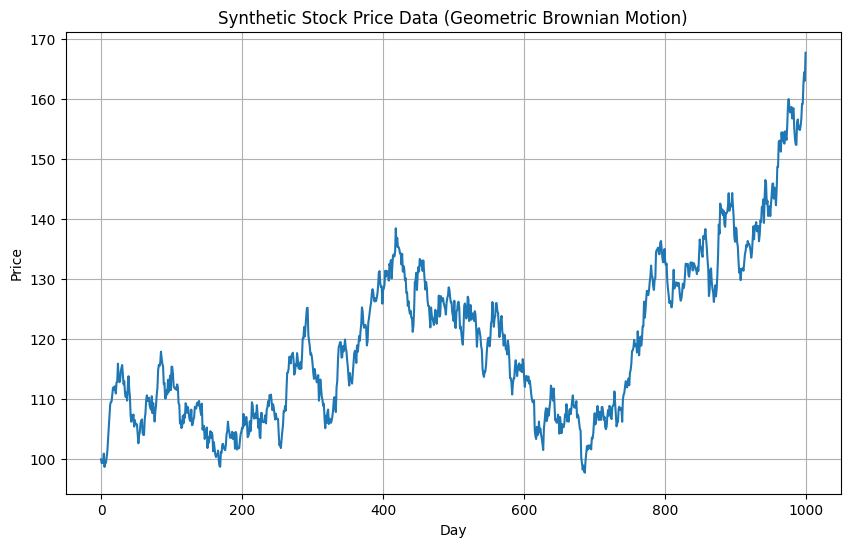

In [20]:
price = stock_price_gbm()
# Plot the synthetic stock price data
plt.figure(figsize=(10, 6))
plt.plot(price)
plt.title("Synthetic Stock Price Data (Geometric Brownian Motion)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.grid(True)
plt.show()